In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm

## investigating volatility linkages between oil, gas, and regionalised coal futures markets ##

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/data/df_ratio.csv'

df_ratio = pd.read_csv(url)
df_ratio["DATE"] = pd.to_datetime(df_ratio["DATE"],dayfirst=True)
for col in df_ratio.columns[1:]:
    df_ratio[col] = pd.to_numeric(df_ratio[col],errors='coerce')

print(df_ratio)

           DATE     WTI_HH     WTI_B    WTI_NBP   WTI_NCF   WTI_RCF      HH_B  \
0    2009-01-02   8.534196  0.984225   5.835755  0.620982  0.570000  0.115327   
1    2009-01-05   8.337907  0.979645   5.833046  0.626014  0.575948  0.117493   
2    2009-01-06   7.960656  0.961013   5.435721  0.597662  0.548701  0.120720   
3    2009-01-07   7.258065  0.932185   4.875176  0.543547  0.495652  0.128434   
4    2009-01-08   6.993289  0.933065   4.918810  0.526595  0.496190  0.133423   
...         ...        ...       ...        ...       ...       ...       ...   
2851 2020-08-25  16.996063  0.941343  13.341687  0.867739  0.882822  0.055386   
2852 2020-08-26  17.146825  0.946757  13.048692  0.869416  0.882737  0.055215   
2853 2020-08-27  17.015873  0.950987  12.170198  0.861044  0.876892  0.055888   
2854 2020-08-28  17.463415  0.937787  11.120637  0.849012  0.822989  0.053700   
2855 2020-08-31  18.526087  0.941034  11.001181  0.820212  0.805482  0.050795   

        HH_NBP    HH_NCF   

In [2]:
## markov regime switching for price ratio returns ##

mod1 = sm.tsa.MarkovRegression(df_ratio["WTI_HH"], k_regimes=2, order=1, switching_variance=True)
mod2 = sm.tsa.MarkovRegression(df_ratio["WTI_B"], k_regimes=2, order=1, switching_variance=True)
mod3 = sm.tsa.MarkovRegression(df_ratio["WTI_NBP"], k_regimes=2, order=1, switching_variance=True)
mod4 = sm.tsa.MarkovRegression(df_ratio["WTI_NCF"], k_regimes=2, order=1, switching_variance=True)
mod5 = sm.tsa.MarkovRegression(df_ratio["WTI_RCF"], k_regimes=2, order=1, switching_variance=False)

mod6 = sm.tsa.MarkovRegression(df_ratio["HH_B"], k_regimes=2, order=1, switching_variance=True)
mod7 = sm.tsa.MarkovRegression(df_ratio["HH_NBP"], k_regimes=2, order=1, switching_variance=True)
mod8 = sm.tsa.MarkovRegression(df_ratio["HH_NCF"], k_regimes=2, order=1, switching_variance=True)
mod9 = sm.tsa.MarkovRegression(df_ratio["HH_RCF"], k_regimes=2, order=1, switching_variance=True)

mod10 = sm.tsa.MarkovRegression(df_ratio["B_NBP"], k_regimes=2, order=1, switching_variance=True)
mod11 = sm.tsa.MarkovRegression(df_ratio["B_NCF"], k_regimes=2, order=1, switching_variance=True)
mod12 = sm.tsa.MarkovRegression(df_ratio["B_RCF"], k_regimes=2, order=1, switching_variance=True)

mod13 = sm.tsa.MarkovRegression(df_ratio["NBP_NCF"], k_regimes=2, order=1, switching_variance=True)
mod14 = sm.tsa.MarkovRegression(df_ratio["NBP_RCF"], k_regimes=2, order=1, switching_variance=True)

mod15 = sm.tsa.MarkovRegression(df_ratio["NCF_RCF"], k_regimes=2, order=1, switching_variance=True)

In [15]:
res_mod8 = mod8.fit()
res_mod8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                 HH_NCF   No. Observations:                 2856
Model:               MarkovRegression   Log Likelihood               10217.501
Date:                Sun, 03 Apr 2022   AIC                         -20423.002
Time:                        16:32:39   BIC                         -20387.259
Sample:                             0   HQIC                        -20410.114
                               - 2856                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0500      0.000    179.752      0.000       0.049       0.051
sigma2       8.33e-05   3.25e-06     25.598      0.000    7.69e-05    8.97e-05
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0314      0.000    210.456      0.000       0.031       0.032
sigma2       2.39e-05   9.82e-07     24.335      0.000     2.2e-05    2.58e-05
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9917      0.003    389.980      0.000       0.987       0.997
p[1->0]        0.0079      0.002      3.416      0.001       0.003       0.013
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [ ]:
print(res_mod.summary().as_latex())

<AxesSubplot:title={'center':'Probability of being in the high regime'}>

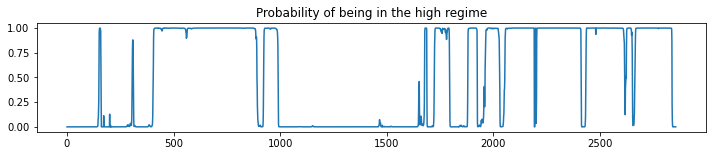

In [16]:
res_mod8.filtered_marginal_probabilities[1].plot(
    title='Probability of being in the high regime', figsize=(12,2))

In [ ]:
plt.plot(df_rr['DATE'],df_rr['RCF_HH'],color='blue')